The Dataset used in this analysis contains the number of minors that have been detained in each US state and the facility they are in, the Categories beeing Adult facilities or Minors facilities

In [1]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [2]:
base_url = 'https://api.census.gov/data/2010/dec/sf1'
get_vars = ['NAME','PCT021005','PCT021015']
predicates = {}
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*'


In [3]:
#realizing the request
r = requests.get(base_url, params= predicates)

In [4]:
#transforming the data to a dataframe
col_names = ['name','in_adult','in_juvinile','state']
states = pd.DataFrame(columns = col_names, data = r.json()[1:])
states[['in_adult','in_juvinile']] = states[['in_adult','in_juvinile']].astype(int)

In [5]:
#visualizing the data frame
states.head()

,name,in_adult,in_juvinile,state
0,Alabama,131,536,01
1,Alaska,83,92,02
2,Arizona,681,629,04
3,Arkansas,89,541,05
4,California,321,6489,06


In [7]:
# Calculate percentage of incarcerated male minors in adult facilities
states['pct_in_adult'] = (states['in_adult']/(states['in_adult']+states['in_juvinile']))*100
states.sort_values(by = 'pct_in_adult',ascending = False, inplace = True)

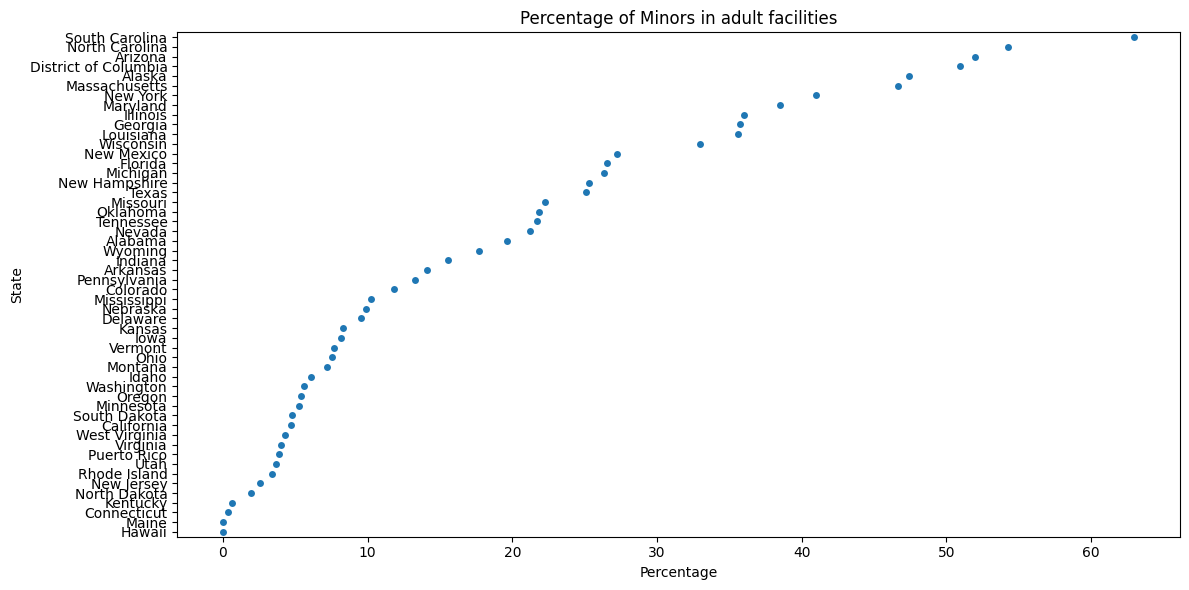

In [14]:
#visualizing
fig, ax = plt.subplots(figsize=(12,6))
graph = sns.stripplot(x = 'pct_in_adult',y = 'name', data = states)
ax.set_xlabel('Percentage')
ax.set_ylabel('State')
ax.set_title('Percentage of Minors in adult facilities')
fig.tight_layout()
plt.show()